In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import random
import math
import peakutils

In [132]:
# Define the system of ODEs
def model(variables, t, params):

    m1, p1, m2, p2, m3, p3 = variables
    k1, k2, k3, a1, a2, a3,g1,g2,g3,n1,n2,n3,b1,b2,b3,dm1,dm2,dm3,dp1,dp2,dp3 = params

    dm1dt = -dm1*m1 + (a1 / (1 + ((1/k1) * p2)**n1)) + g1
    dp1dt = (b1*m1) - (dp1*p1)
    dm2dt = -dm2*m2 + (a2 / (1 + ((1/k2) * p3)**n2)) + g2
    dp2dt = (b2*m2) - (dp2*p2)
    dm3dt = -dm3*m3 + (a3 / (1 + ((1/k3) * p1)**n3)) + g3
    dp3dt = (b3*m3)-(dp3*p3)
    
    return [dm1dt, dp1dt, dm2dt, dp2dt, dm3dt, dp3dt]


initial_conditions = np.array([0.0, 2.0, 0.0, 1.0, 0.0, 3.0])
t = np.linspace(0, 100, 48000)
solutions = []
parameters = []
# Generate random initial values
for i in range(0,1000):       
    k1 = k2 = k3 = np.random.uniform((10**-2), 250)
    a1 = a2 = a3 = np.random.uniform(20, 40)
    g1 = g2 = g3 = np.random.uniform(0,5)
    n1 = n2 = n3 = random.randint(1,5)
    b1 = b2 = b3 = np.random.uniform((10**-2),50)
    dm1 = dm2 = dm3 = np.random.uniform(1,3)
    dp1 = dp2 = dp3 = np.random.uniform(0.7,0.8)
    params = [k1, k2, k3, a1, a2, a3,g1,g2,g3,n1,n2,n3,b1,b2,b3,dm1,dm2,dm3,dp1,dp2,dp3]
    solution = odeint(model, initial_conditions, t, args=(params,))
    parameters.append(params)
    solutions.append(solution)


In [133]:
sample_rate = 0.0033333333 #Hz 
dt = 0.001
T = 48
samples_per_hour = (1/dt)		
jump = int(samples_per_hour/(sample_rate*3600))
N = int(T/dt)
nS = N/jump

In [192]:
def cost_oscillations(solutions):
    oscillatory_solutions = []
    oscillatory_parameters = []
    number = 0
    for solution, parameter in zip(solutions, parameters):
        data = solution[20000:,1]
        data = data[0::jump]
        res = abs(np.fft.rfft(data))
		#normalize the amplitudes
        fftData = res/math.ceil(nS/2)
        fftData = np.array(fftData) 
        indexes = peakutils.indexes(fftData, thres=0.02/max(fftData), min_dist=1) 
        if len(indexes) == 0:
            continue
		#if amplitude is greater than 400nM
        amp = np.max(fftData[indexes])
        if amp > 10:
            number += 1
            oscillatory_solutions.append(solution)
            oscillatory_parameters.append(parameter)
    print(number)
    return oscillatory_solutions, oscillatory_parameters


In [193]:

oscillatory_solutions, oscillatory_parameters = cost_oscillations(solutions)

317


[[104.02468968707345, 104.02468968707345, 104.02468968707345, 36.81797811695671, 36.81797811695671, 36.81797811695671, 1.3515127830534523, 1.3515127830534523, 1.3515127830534523, 3, 3, 3, 43.43698380995929, 43.43698380995929, 43.43698380995929, 2.2491024418676977, 2.2491024418676977, 2.2491024418676977, 0.7747671591505249, 0.7747671591505249, 0.7747671591505249], [159.73288329542842, 159.73288329542842, 159.73288329542842, 29.9870215196518, 29.9870215196518, 29.9870215196518, 0.4705026121067035, 0.4705026121067035, 0.4705026121067035, 3, 3, 3, 11.530506239959008, 11.530506239959008, 11.530506239959008, 2.096894646147146, 2.096894646147146, 2.096894646147146, 0.7070029254297894, 0.7070029254297894, 0.7070029254297894], [244.1218842623797, 244.1218842623797, 244.1218842623797, 21.259571110358685, 21.259571110358685, 21.259571110358685, 0.7665321375314949, 0.7665321375314949, 0.7665321375314949, 1, 1, 1, 26.887326872473338, 26.887326872473338, 26.887326872473338, 1.3919799795225627, 1.391

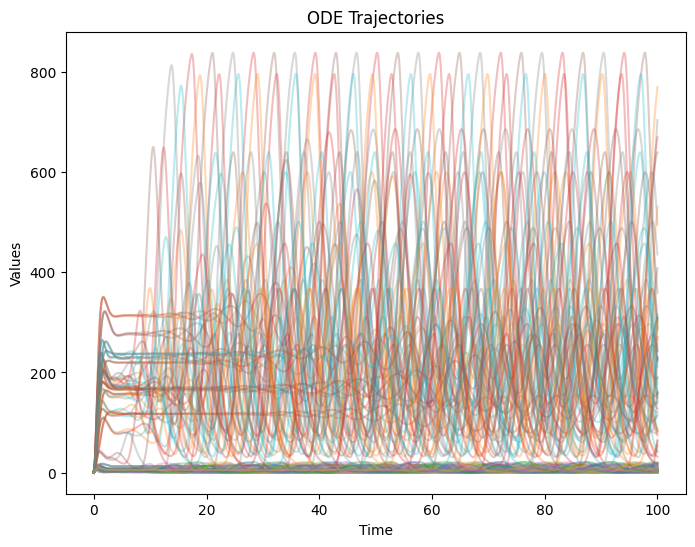

In [199]:

# Plot the trajectories
solution = oscillatory_solutions[5]
print(parameters)
plt.figure(figsize=(8, 6))
#for solution in solutions[1:2,5:6]:

for solution in oscillatory_solutions[10:30]:
    plt.plot(t, solution[:,0], label='y1', alpha = 0.3)
    plt.plot(t, solution[:,1], label='y2', alpha = 0.3)
    plt.plot(t, solution[:,2], label='y3', alpha = 0.3)
    plt.plot(t, solution[:,3], label='y4', alpha = 0.3)
    plt.plot(t, solution[:,4], label='y5', alpha = 0.3)
    plt.plot(t, solution[:,5], label='y6', alpha = 0.3)

plt.title('ODE Trajectories')
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()

